In [297]:
import gensim
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [8]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

In [9]:
np.dot(model['United_States'],model['U.S.'])/(np.linalg.norm(model['United_States'])*np.linalg.norm(model['U.S.']))

0.7310775

In [14]:
model.most_similar('United_States')[:10]

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

In [18]:
model.most_similar(positive = ['Spain','Athens'],negative=['Madrid'],topn=10)

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

In [55]:
analogy_data = pd.read_csv('questions-words.txt',delimiter=' ',skiprows=1,names=[1,2,3,4])
analogy_data = analogy_data.loc[analogy_data[1] != ':']

In [70]:
similar = analogy_data.apply(lambda row : model.most_similar(positive = [row[1],row[3]],negative=[row[2]],topn=1),axis=1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-70-720a40cf6532>", line 1, in <module>
    similar = analogy_data.apply(lambda row : model.most_similar(positive = [row[1],row[3]],negative=[row[2]],topn=1),axis=1)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py", line 7768, in apply
    return op.get_result()
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/apply.py", line 185, in get_result
    return self.apply_standard()
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/apply.py", line 276, in apply_standard
    results, res_index = self.apply_series_generator()
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/pyt

TypeError: object of type 'NoneType' has no len()

In [3]:
combined = pd.read_csv('wordsim353/combined.csv')

In [29]:
combsim = combined.apply(lambda row : model.similarity(row[0],row[1]),axis = 1)
combined['Model Similarity'] = combsim

In [88]:
modelsim = np.argsort(np.argsort(combined['Model Similarity']))
humansim = np.argsort(np.argsort(combined['Human (mean)']))

In [99]:
1 - sum([(modelsim[a] - humansim[a])**2 for a in range(len(modelsim))])*6/((len(modelsim)**3-len(modelsim)))

0.6997112576768793

In [288]:
countries = pd.read_csv('countries.csv')
countries['name'] = countries['name'].str.replace(' ', '_')
countries['name'] = countries['name'].str.replace('\[','')
countries['name'] = countries['name'].str.replace('\]','')
countries['name'] = countries['name'].str.replace('\-','_')
bad_countries = ['American_Samoa','Antigua_and_Barbuda','Bosnia_and_Herzegovina','Central_African_Republic','Congo_Republic'
                ,'Côte_d\'Ivoire','Christmas_Island','Falkland_Islands_Islas_Malvinas','South_Georgia_and_the_South_Sandwich_Islands'
                ,'Heard_Island_and_McDonald_Islands','Isle_of_Man','British_Indian_Ocean_Territory','Saint_Kitts_and_Nevis'
                ,'New_Caledonia','Norfolk_Island','Papua_New_Guinea','Saint_Pierre_and_Miquelon','Saint_Helena','Svalbard_and_Jan_Mayen' 
                ,'São_Tomé_and_Príncipe','Turks_and_Caicos_Islands','French_Southern_Territories','Trinidad_and_Tobago'
                ,'U.S._Minor_Outlying_Islands','Vatican_City','Saint_Vincent_and_the_Grenadines','U.S._Virgin_Islands','Wallis_and_Futuna']
countries = countries[countries['name'].isin(bad_countries)==False]
countryvec = model[countries['name']]

<ipython-input-288-2855f5d4163c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  countries['name'] = countries['name'].str.replace('\[','')
<ipython-input-288-2855f5d4163c>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  countries['name'] = countries['name'].str.replace('\]','')
<ipython-input-288-2855f5d4163c>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  countries['name'] = countries['name'].str.replace('\-','_')


In [289]:
kmean = KMeans(5)
kmean.fit(countryvec)

KMeans(n_clusters=5)

In [291]:
countries['kmean_group'] = kmean.predict(countryvec)

In [293]:
ward = AgglomerativeClustering(n_clusters = 5,linkage = 'ward')
ward.fit(countryvec)
countries['ward_group'] = ward.fit_predict(countryvec)

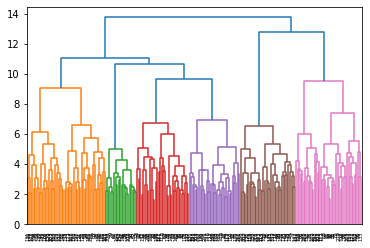

<Figure size 1440x4320 with 0 Axes>

In [306]:
hierarchy.dendrogram(hierarchy.ward(countryvec))
plt.figure(figsize=[20,60])
plt.setp
plt.show()

In [307]:
from sklearn.manifold import TSNE

In [320]:
tsne = TSNE(2)
tsne.fit(countryvec)

TSNE()

In [317]:
exes = [x[0] for x in countrytsne]
weyes = [y[1] for y in countrytsne]

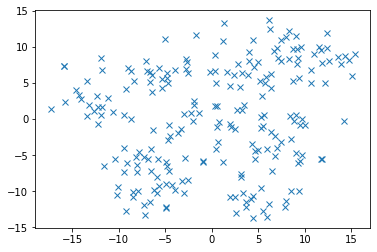

In [318]:
plt.plot(exes,weyes,'x')

In [321]:
ctsne = tsne.fit_transform(countryvec)

In [324]:
ctsne

array([[-5.72470665e+00, -7.55545759e+00],
       [ 1.21288991e+00, -1.09177103e+01],
       [ 5.00716352e+00, -2.43701553e+00],
       [-5.66934681e+00,  1.17068958e+01],
       [-1.02155819e+01, -1.02655487e+01],
       [-7.81550121e+00, -1.28849306e+01],
       [-5.93255639e-01, -1.51700382e+01],
       [ 2.53738880e+00,  8.64311886e+00],
       [-3.95426106e+00, -8.10910523e-01],
       [-8.02791309e+00,  1.81171870e+00],
       [-7.27665663e+00, -5.65629768e+00],
       [ 7.89524838e-02, -3.52945375e+00],
       [-1.16286592e+01,  5.99622822e+00],
       [-7.23477507e+00, -1.32534370e+01],
       [-5.15290165e+00,  1.08919506e+01],
       [ 3.30253911e+00, -4.51808500e+00],
       [-7.02960920e+00, -3.54624510e+00],
       [ 4.79509592e+00,  6.11042356e+00],
       [-7.73116541e+00, -9.56714821e+00],
       [ 2.77759814e+00, -1.13288174e+01],
       [ 8.83718014e+00,  8.81660748e+00],
       [ 5.47671413e+00,  7.89166260e+00],
       [-7.12867594e+00,  1.17383137e+01],
       [ 3.

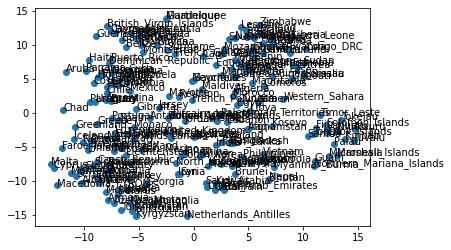

<Figure size 720x720 with 0 Axes>

In [348]:
fig, ax = plt.subplots()
ax.scatter(*list(zip(*ctsne)))
plt.figure(figsize=(10, 10))
for a in range(len(ctsne)):
    ax.annotate(countries['name'].iloc[a],(ctsne[a][0],ctsne[a][1]))